<a href="https://colab.research.google.com/github/SRINI-J/Object_detection/blob/main/ssd_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms as T

from PIL import Image
import cv2
import google
from google.colab.patches import cv2_imshow


In [ ]:
model = torchvision.models.detection.ssd300_vgg16(pretrained= True)

In [ ]:
model.eval()

SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [ ]:
img = Image.open("/content/key_frame_2139.jpg")

In [ ]:
transform = T.ToTensor()
image = transform(img)

In [ ]:
with torch.no_grad():
    pred = model([image])

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'scores', 'labels'])

In [ ]:
bboxes , scores , labels = pred[0]["boxes"] , pred[0]["scores"] , pred[0]["labels"]

In [ ]:
bboxes

tensor([[1.2666e+03, 4.1742e+02, 1.7049e+03, 1.0884e+03],
        [2.2844e+02, 8.6355e+02, 8.8620e+02, 1.2290e+03],
        [1.2879e+03, 7.7481e+02, 1.6972e+03, 1.0533e+03],
        [3.9418e+01, 9.1853e+02, 5.7597e+02, 1.1884e+03],
        [1.0153e+03, 8.9903e+02, 1.2219e+03, 1.0070e+03],
        [0.0000e+00, 9.3599e+02, 9.5345e+02, 1.7262e+03],
        [2.6308e+01, 8.4982e+02, 5.6371e+02, 1.0760e+03],
        [5.7960e+02, 1.9158e+02, 7.1372e+02, 3.4550e+02],
        [5.2602e+02, 9.1159e+02, 8.6456e+02, 1.2351e+03],
        [5.0420e+02, 1.8074e+02, 6.3897e+02, 3.5595e+02],
        [3.5504e+02, 4.1969e+02, 4.7962e+02, 6.1718e+02],
        [1.4694e+02, 1.5575e+02, 1.5256e+03, 1.1008e+03],
        [4.0157e+02, 8.4113e+02, 9.1196e+02, 1.0674e+03],
        [6.0333e+02, 9.9516e+02, 7.1008e+02, 1.1797e+03],
        [1.2777e+03, 9.0260e+02, 1.3841e+03, 1.0473e+03],
        [4.8046e+01, 6.8464e+02, 9.0412e+02, 1.2141e+03],
        [2.1256e+03, 1.1388e+02, 2.2521e+03, 3.1090e+02],
        [6.029

In [ ]:
scores

tensor([0.6079, 0.2279, 0.1705, 0.1128, 0.1099, 0.1000, 0.0938, 0.0885, 0.0864,
        0.0838, 0.0796, 0.0781, 0.0774, 0.0750, 0.0750, 0.0747, 0.0735, 0.0718,
        0.0712, 0.0711, 0.0706, 0.0691, 0.0687, 0.0677, 0.0671, 0.0668, 0.0666,
        0.0665, 0.0660, 0.0658, 0.0657, 0.0652, 0.0651, 0.0649, 0.0634, 0.0631,
        0.0621, 0.0619, 0.0619, 0.0618, 0.0617, 0.0617, 0.0616, 0.0611, 0.0611,
        0.0610, 0.0610, 0.0609, 0.0602, 0.0597, 0.0595, 0.0595, 0.0595, 0.0594,
        0.0590, 0.0589, 0.0588, 0.0586, 0.0582, 0.0574, 0.0571, 0.0570, 0.0570,
        0.0566, 0.0563, 0.0559, 0.0559, 0.0555, 0.0555, 0.0555, 0.0554, 0.0553,
        0.0549, 0.0548, 0.0546, 0.0545, 0.0542, 0.0541, 0.0540, 0.0539, 0.0538,
        0.0536, 0.0534, 0.0530, 0.0526, 0.0521, 0.0520, 0.0519, 0.0519, 0.0516,
        0.0514, 0.0512, 0.0512, 0.0510, 0.0508, 0.0504, 0.0503, 0.0500, 0.0500,
        0.0499, 0.0498, 0.0496, 0.0493, 0.0491, 0.0489, 0.0488, 0.0488, 0.0486,
        0.0486, 0.0485, 0.0483, 0.0483, 

In [ ]:
labels

tensor([ 8,  3,  8,  3,  3,  3,  3,  1,  3,  1,  1,  8,  3,  1,  3,  8,  1,  1,
         6,  1,  1,  8,  1,  3,  3,  1,  3,  1,  1,  1,  3,  3,  3,  3,  1,  3,
        10,  1,  3,  1,  1,  1,  1,  3,  1, 10,  1,  1,  1,  3,  1,  1,  3,  8,
         1, 10,  3,  1,  3,  1,  1,  1,  1,  1,  3,  3,  8,  8,  1,  1,  1,  1,
         1, 10,  3,  1,  1,  1,  3,  1, 10,  1,  1,  1,  3,  1,  1,  3,  1,  3,
         3,  1,  3,  1,  3,  3,  3, 10,  1,  1, 10,  1,  1, 10,  3,  1,  1,  1,
         1,  1,  3,  1,  3,  1,  1,  8,  3,  3, 10,  8,  1,  3,  1,  1,  1, 10,
         3,  1,  8,  3,  1,  1,  1, 10, 10,  3,  1,  1,  1,  3,  1,  1,  1,  1,
         1,  1,  1,  1,  3, 10,  1,  3,  3,  3,  8, 10,  3,  1,  1,  1,  3,  1,
         1,  1,  1,  8,  3,  3,  1,  1,  3,  1,  1,  1,  1,  1,  3,  3,  1,  1,
         3,  1,  1,  1,  1,  1, 10,  1,  3,  3,  1,  1,  1,  1,  1,  1,  3,  1,
         1,  8])

In [ ]:
num = torch.argwhere(scores > 0.2).shape[0]

In [ ]:
num

2

In [ ]:
label_name =["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
font = cv2.FONT_HERSHEY_DUPLEX

In [ ]:
igg = cv2.imread("/content/key_frame_2139.jpg")
for i in range(num):
    x1 , y1 , x2 ,y2 = bboxes[i].numpy().astype("int")
    igg = cv2.rectangle(igg , (x1 , y1) , (x2 , y2) , (0 , 255 , 0) , 2)
    class_name = label_name[labels.numpy()[i] - 1]
    igg = cv2.putText(igg , class_name , (x1 , y1 -10), font , 1.0 , ( 255 , 255, 0), 2 , cv2.LINE_AA)

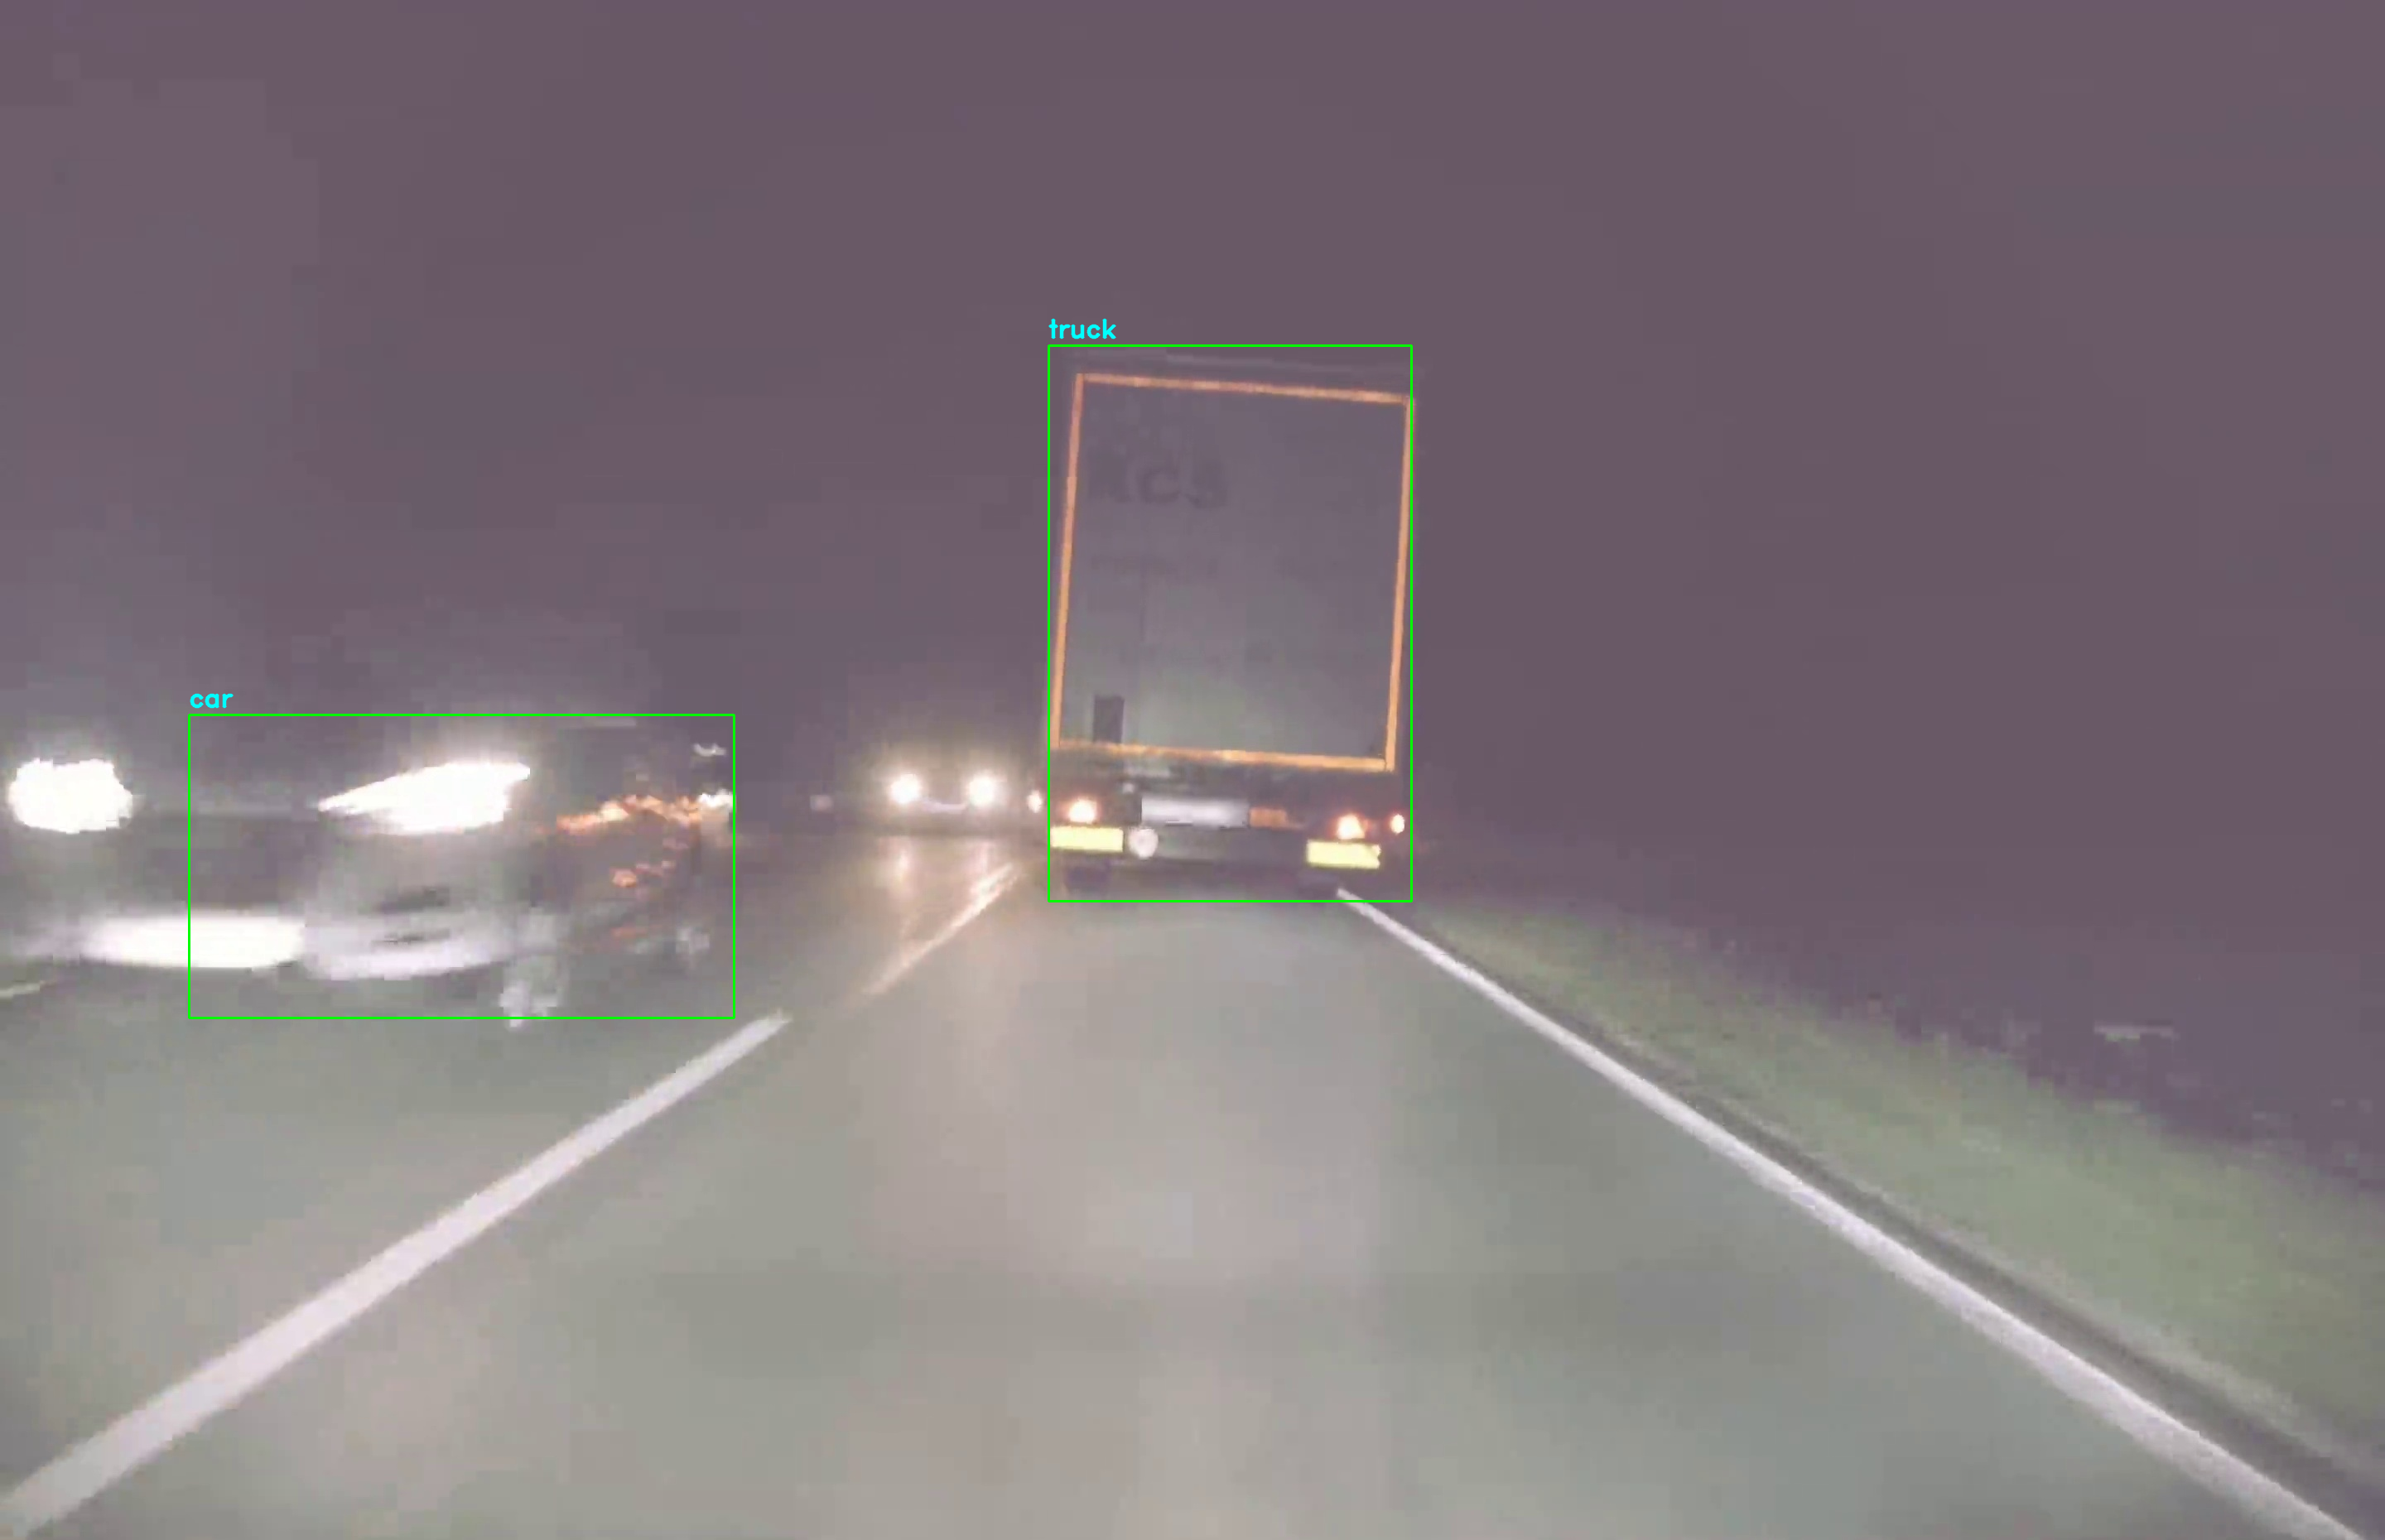

In [ ]:
cv2_imshow(igg)